In [1]:
%pylab inline
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import researchpy as rp
from scipy import stats
from pprint import pprint


Populating the interactive namespace from numpy and matplotlib


In [2]:
xlsx = pd.ExcelFile('project 2-1.xlsx')

In [3]:
drug_data = pd.read_excel(xlsx, 'Sheet1', skiprows=[0,1,2])

# Original shape  (rows and columns)
print(drug_data.shape)

(37, 6)


In [4]:
drug_data.head()

,STATE,2012,2013,2014,2015,2016
0,ABIA,21,6,13,42,46
1,ADAMAWA,73,227,98,84,120
2,AKWAIBOM,44,45,30,30,14
3,ANAMBRA,7,9,38,20,50
4,BAUCHI,33,23,96,95,4


In [5]:
dData = drug_data.set_index("STATE")

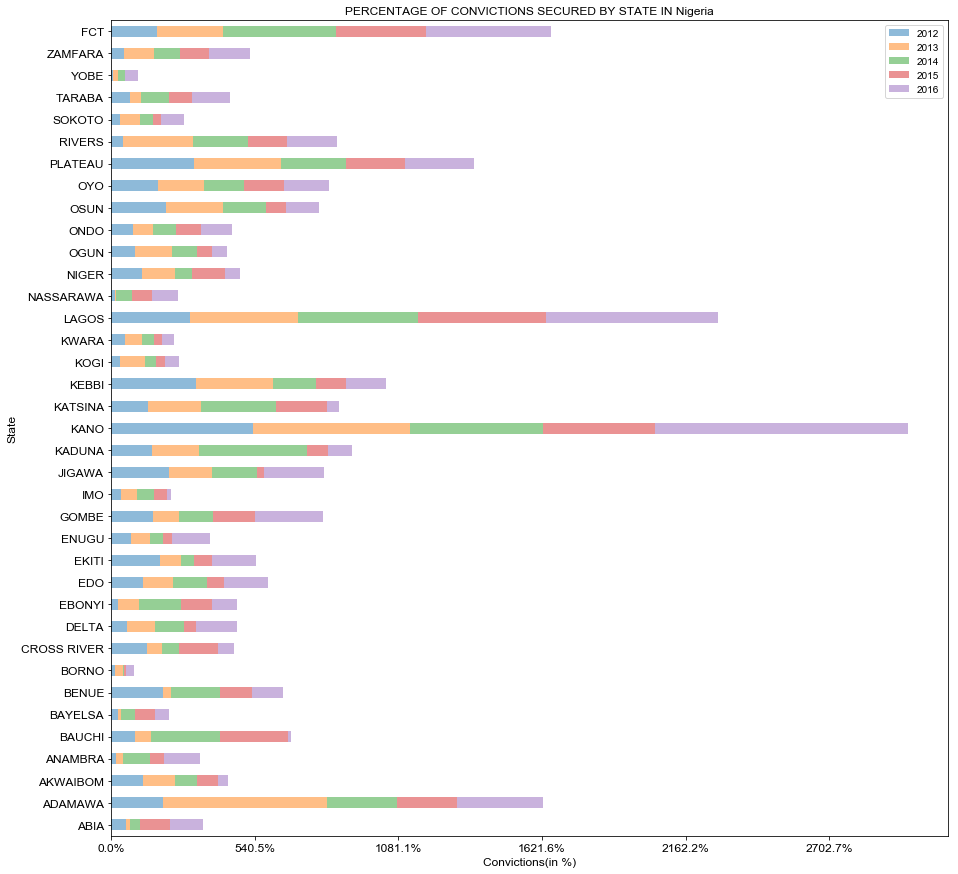

In [6]:
axi = dData.plot(kind='barh', title ="PERCENTAGE OF CONVICTIONS SECURED BY STATE IN Nigeria", stacked=True, alpha=0.5, figsize=(15, 15), legend=True, fontsize=12)
sns.set_style('whitegrid')
total = float(len(drug_data))
axi.set_xlabel("Convictions(in %)", fontsize=12)
axi.set_ylabel("State", fontsize=12)
axi.set_xticklabels(map('{:.1f}%'.format, 100*axi.xaxis.get_majorticklocs()/total))
'''
for p in axi.patches:       
    height = p.get_height()
    axi.text(p.get_x()+p.get_width()/2.,
    height + 3,
    '{:1.2f}'.format(height/total),
    ha="center")
'''
plt.show()

In [7]:
def make_barplot(pData, original_df, title, figure=None, fontsize=None ):
    axi = pData.plot(kind='bar', title =title, stacked=True, alpha=0.5, figsize=figure, legend=True, fontsize=fontsize)
    sns.set_style('whitegrid')
    total = float(len(original_df))
    axi.set_ylabel("Convictions(in %)", fontsize=fontsize)
    axi.set_xlabel("State", fontsize=fontsize)
    axi.set_yticklabels(map('{:.1f}%'.format, 100*axi.yaxis.get_majorticklocs()/total))
    '''
    for p in axi.patches:       
        height = p.get_height()
        axi.text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{:1.2f}'.format(height/total),
        ha="center")
    '''
    plt.show()

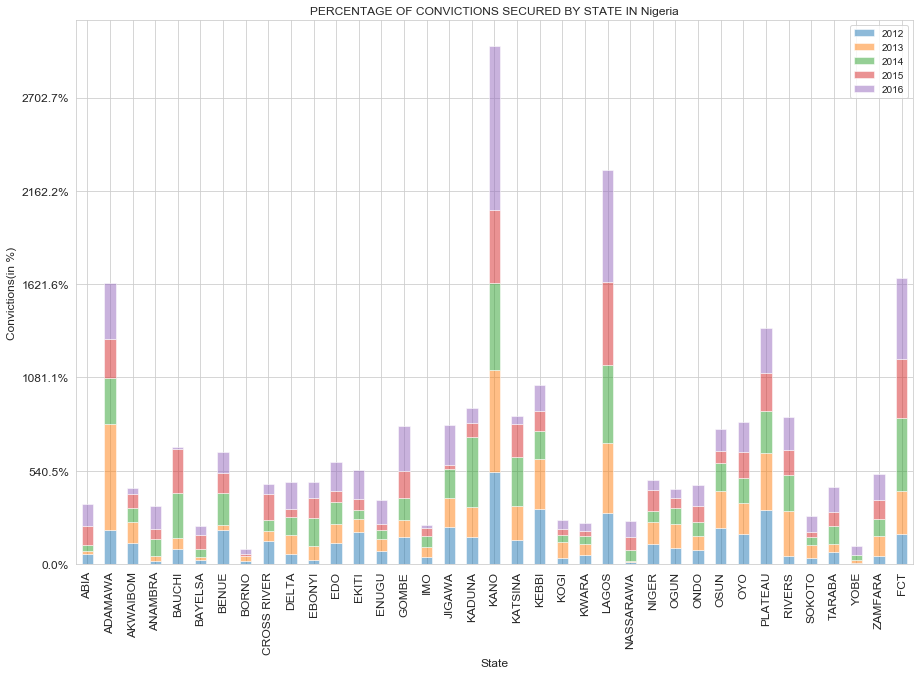

In [8]:
make_barplot(pData=dData, original_df=drug_data, title="PERCENTAGE OF CONVICTIONS SECURED BY STATE IN Nigeria", figure=(15, 10), fontsize=12)


In [9]:
# Extract and create rows
data = []
for row in drug_data.itertuples():
    for i in range(1, len(row)):
        data.append([row[i], row[0]])
#        self.rv_data = [{'text': str(x[0]), 'Index': str(x[1]), 'selectable': True} for x in data]

In [10]:
states = drug_data["STATE"].values.tolist()

In [11]:
columns = list(drug_data.columns)

In [12]:
twenty12 = drug_data[columns[1]].values.tolist()

In [13]:
twenty13 = drug_data[columns[2]].values.tolist()

In [14]:
twenty14 = drug_data[columns[3]].values.tolist()

In [15]:
twenty15 = drug_data[columns[4]].values.tolist()

In [16]:
twenty16 = drug_data[columns[5]].values.tolist()

In [17]:
twenty12_states = [states[i] for i, number in enumerate(list(twenty12)) for list(states)[i] in range(number)]

In [18]:
twenty13_state = [states[i] for i, number in enumerate(list(twenty13)) for list(states)[i] in range(number)]

In [19]:
twenty14_state = [states[i] for i, number in enumerate(list(twenty14)) for list(states)[i] in range(number)]

In [20]:
twenty15_state = [states[i] for i, number in enumerate(list(twenty15)) for list(states)[i] in range(number)]

In [21]:
twenty16_state = [states[i] for i, number in enumerate(list(twenty16)) for list(states)[i] in range(number)]

In [22]:
states_across = twenty12_states+twenty13_state+twenty14_state+twenty15_state+twenty16_state 

In [23]:
twenty12_year = ["2012" for _ in range(len(twenty12_states))]
twenty13_year = ["2013" for _ in range(len(twenty13_state))]
twenty14_year  = ["2014" for _ in range(len(twenty14_state))]
twenty15_year = ["2015" for _ in range(len(twenty15_state))]
twenty16_year  = ["2016" for _ in range(len(twenty16_state))]

In [24]:
year_across = twenty12_year+twenty13_year+twenty14_year+twenty15_year+twenty16_year 

In [25]:
print("states:", len(states_across))

states: 9675


In [26]:
print("years:", len(year_across))

years: 9675


In [27]:
index = [_ for  _ in range(len(year_across))]
columns=pd.Index(['State', 'Year'], name='Drug')
#mydata = dict(voice = is_voice, internet = is_internet) 
#df = pd.DataFrame()
drug_data = list(zip(states_across, year_across))
#list(drug_data)
df = pd.DataFrame(drug_data, index, columns)

In [28]:
df.tail()

Drug,State,Year
9670,FCT,2016
9671,FCT,2016
9672,FCT,2016
9673,FCT,2016
9674,FCT,2016


In [29]:
writer = pd.ExcelWriter('project 2.xlsx')
df.to_excel(writer, 'Sheet3')
writer.save()

#df.groupby(["State", "Year"])["State", "Year"].count()
#crossdf = pd.crosstab(df['State'], df['Year'])
#crossdf.unstack(['State', 'Year'])

In [30]:
def make_twiplot_y(the_df, field, hue, title, figsize, check=None, orient = None, rotation=None, fontsize=None):
    
    sns.set_style('whitegrid')
    total = float(len(the_df[field]))
    plt.figure(figsize=figsize)
    ax = sns.countplot(y=field, hue=hue, data=the_df)

    plt.title(title)
    plt.xlabel('Frequency [%]')
    '''    
    for p in ax.patches:       
        height = p.get_height()
        ax.text(p.get_y()+p.get_width()/2.,
        height + 3,
        '{:1.2f}'.format(height/total),
        ha="center")
    '''    
    for p in ax.patches:

        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_y()+0.1, p.get_height()+5))
        
    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    #ax.xaxis.set_ticks(np.linspace(0, total, 11))

    #adjust the ticklabel to the desired format, without changing the position of the ticks
    #_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    #ax.set_xticklabels(map('{:.1f}%'.format, 100*ax.xaxis.get_majorticklocs()/total))
    
    ax.set_yticklabels(ax.get_yticklabels(), rotation=rotation, ha="right", fontsize=fontsize)
    plt.tight_layout()
    
    plt.show()

In [31]:
#make_twiplot_y(the_df=df, field="State", hue="Year", title="The distribution of Hard Drug Victims by State in Nigeria", figsize=(9, 25), orient ="v", rotation=None, fontsize=None)
#sns.countplot(x="State", hue="Year", data=df)

In [32]:
df.describe()

Drug,State,Year
count,9675,9675
unique,37,5
top,KANO,2016
freq,1110,2248


In [33]:
np.array(drug_data)

array([['ABIA', '2012'],
       ['ABIA', '2012'],
       ['ABIA', '2012'],
       ...,
       ['FCT', '2016'],
       ['FCT', '2016'],
       ['FCT', '2016']], dtype='<U11')

In [34]:
def make_plot(the_df, field, title, figsize, rotation=None, fontsize=None):
    sns.set_style('whitegrid')
    total = len(the_df[field])*1.
    plt.figure(figsize=figsize)
    ax = sns.countplot(x = field, data = the_df, palette = 'hls' )
    plt.title(title)
    #plt.ylabel('Frequency [%]')
    plt.ylabel('Frequency')
    
    if len(ax.patches)< 8:
        # Format 250 (60%)
        for p in ax.patches:
            ax.annotate('{} ({:.1f}%)'.format(p.get_height(), 100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    else:
        # Format 60%
        for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
        
    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    #ax.yaxis.set_ticks(np.linspace(0, total, 11))

    #adjust the ticklabel to the desired format, without changing the position of the ticks
    #_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha="right", fontsize=fontsize)
    plt.tight_layout()
    plt.show()
    if len(ax.patches)< 8:
        # Format 250 (60%)
        for p in ax.patches:
            ax.annotate('{} ({:.1f}%)'.format(p.get_height(), 100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    else:
        # Format 60%
        for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
        
    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    #ax.yaxis.set_ticks(np.linspace(0, total, 11))

    #adjust the ticklabel to the desired format, without changing the position of the ticks
    #_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha="right", fontsize=fontsize)
    plt.tight_layout()
    plt.show()


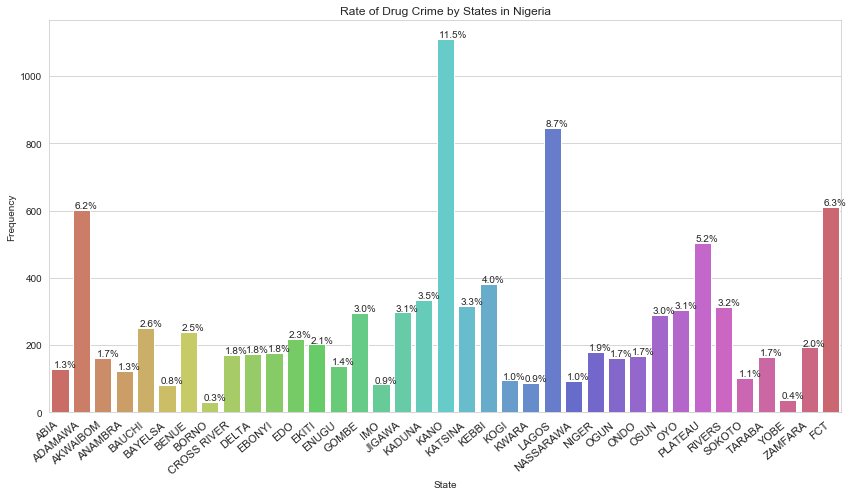

<Figure size 432x288 with 0 Axes>

In [35]:
make_plot(the_df = df, field='State', title="Rate of Drug Crime by States in Nigeria" , figsize=(12, 7), rotation=40, fontsize=11)



#df["Row total"]

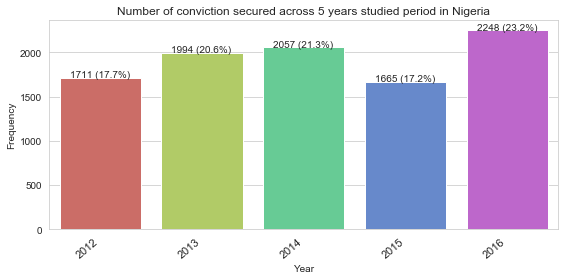

<Figure size 432x288 with 0 Axes>

In [36]:
make_plot(the_df = df, field="Year", title="Number of conviction secured across 5 years studied period in Nigeria" , figsize=(8, 4), rotation=40, fontsize=11)



In [37]:
def geo_zones(series):
    if series.title() in ["Benue", "Kogi", "Kwara", "Nasarawa", "Niger", "Plateau", "Fct"]:
#    if series.lower() == 'Benue' or series.lower() == 'no':
        return "North Central"
    elif series.title() in ["Adamawa", "Bauchi", "Borno", "Gombe", "Taraba", "Yobe"]:
        return "North East"
    elif series.title() in ["Jigawa", "Kaduna", "Kano", "Katsina", "Kebbi","Sokoto", "Zamfara"]:
        return "North West"
    elif series.title() in ["Abia", "Anambra", "Ebonyi", "Enugu", "Imo"]:
        return "South East"
    elif series.title() in ["Akwa Ibom", "Cross River", "Bayelsa", "Rivers", "Delta", "Edo"]:
        return "South South"
    elif series.title() in ["Ekiti", "Lagos", "Ogun", "Ondo", "Osun", "Oyo"]:
        return "South West"


In [38]:
def high_convicted_zones(series):

    if series.title() in ["Adamawa", "Bauchi", "Borno", "Gombe", "Taraba", "Yobe"]:
        return "North East"
    elif series.title() in ["Jigawa", "Kaduna", "Kano", "Katsina", "Kebbi","Sokoto", "Zamfara"]:
        return "North West"
    elif series.title() in ["Ekiti", "Lagos", "Ogun", "Ondo", "Osun", "Oyo"]:
        return "South West"
    elif series.title() in ["Abia", "Anambra", "Ebonyi", "Enugu", "Imo"]:
        return "South East"

    else:
        return

def low_convicted_zones(series):
    if series.title() in ["Benue", "Kogi", "Kwara", "Nasarawa", "Niger", "Plateau", "Fct"]:
#    if series.lower() == 'Benue' or series.lower() == 'no':
        return "North Central"
    elif series.title() in ["Akwa Ibom", "Cross River", "Bayelsa", "Rivers", "Delta", "Edo"]:
        return "South South"
    else:
        return


In [39]:
north_central = ["Benue", "Kogi", "Kwara", "Nasarawa", "Niger", "Plateau", "Fct"]
north_east = ["Adamawa", "Bauchi", "Borno", "Gombe", "Taraba", "Yobe"]
north_west = ["Jigawa", "Kaduna", "Kano", "Katsina", "Kebbi","Sokoto", "Zamfara"]
south_east = ["Abia", "Anambra", "Ebonyi", "Enugu", "Imo"]
south_south = ["Akwa Ibom", "Cross River", "Bayelsa", "Rivers", "Delta", "Edo"]
south_west = ["Ekiti", "Lagos", "Ogun", "Ondo", "Osun", "Oyo"]

def geo_zone(series, geo_list):
    if series.title() in geo_list:
#    if series.lower() == 'Benue' or series.lower() == 'no':
        return series
    else:
        return

In [40]:
 df['Geo_zones'] = df['State'].apply(geo_zones)

In [41]:
df['High_zones'] = df['State'].apply(high_convicted_zones)

In [42]:
df['Low_zones'] = df['State'].apply(low_convicted_zones)

In [43]:
# lambda series: Nb: lambda expression was added bere

df["north_central"]=df["State"].apply(lambda series: geo_zone(series, north_central))
df["north_east"] = df["State"].apply(lambda series: geo_zone(series, north_east))
df["north_west"] = df["State"].apply(lambda series: geo_zone(series, north_west))
df["south_east"] = df["State"].apply(lambda series: geo_zone(series, south_east))
df["south_south"] = df["State"].apply(lambda series: geo_zone(series, south_south))
df["south_west"] = df["State"].apply(lambda series: geo_zone(series, south_west))

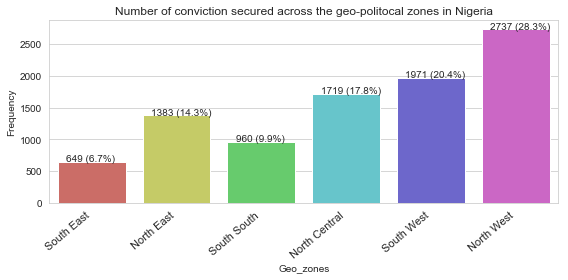

<Figure size 432x288 with 0 Axes>

In [44]:
make_plot(the_df = df, field="Geo_zones", title="Number of conviction secured across the geo-politocal zones in Nigeria" , figsize=(8, 4), rotation=40, fontsize=11)

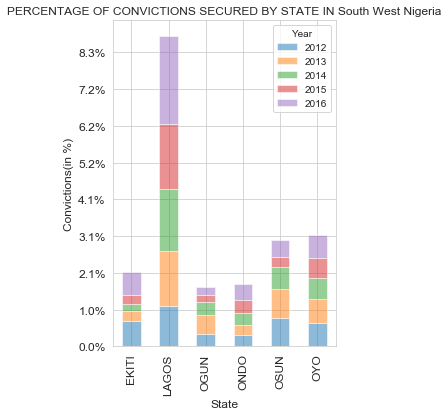

In [45]:
sw = pd.crosstab(df['south_west'], df['Year'])
make_barplot(pData=sw, original_df=drug_data, title="PERCENTAGE OF CONVICTIONS SECURED BY STATE IN South West Nigeria", figure=(4, 6), fontsize=12)
#crossdf.unstack(['State', 'Year'])

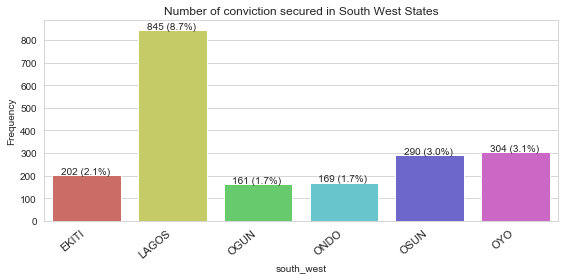

<Figure size 432x288 with 0 Axes>

In [46]:
make_plot(the_df = df, field="south_west", title="Number of conviction secured in South West States" , figsize=(8, 4), rotation=40, fontsize=11)


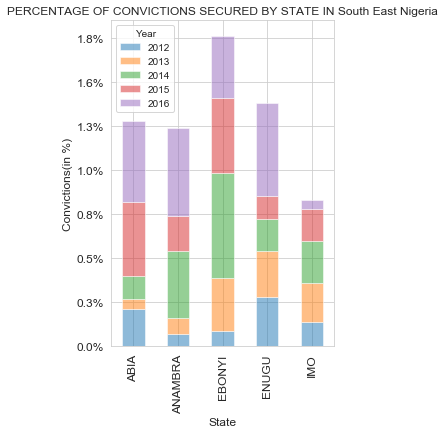

In [47]:
se = pd.crosstab(df['south_east'], df['Year'])
make_barplot(pData=se, original_df=drug_data, title="PERCENTAGE OF CONVICTIONS SECURED BY STATE IN South East Nigeria", figure=(4, 6), fontsize=12)


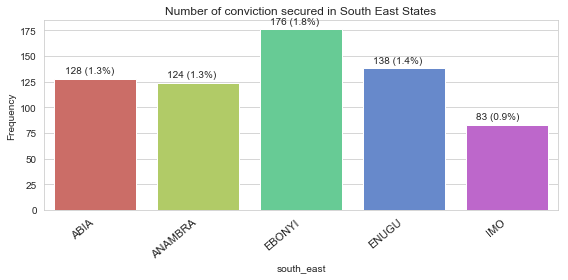

<Figure size 432x288 with 0 Axes>

In [48]:
make_plot(the_df = df, field="south_east", title="Number of conviction secured in South East States" , figsize=(8, 4), rotation=40, fontsize=11)


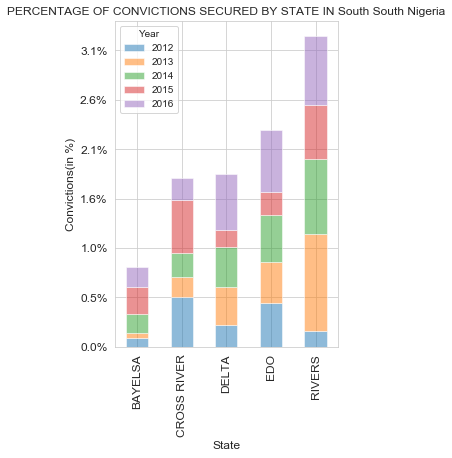

In [49]:
ss = pd.crosstab(df['south_south'], df['Year'])
make_barplot(pData=ss, original_df=drug_data, title="PERCENTAGE OF CONVICTIONS SECURED BY STATE IN South South Nigeria", figure=(4, 6), fontsize=12)

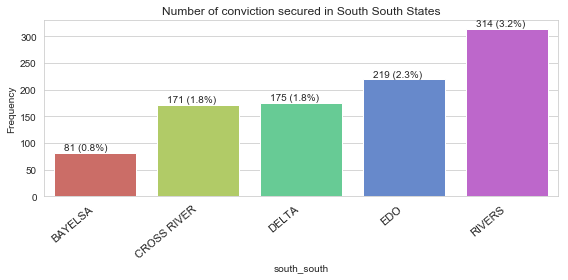

<Figure size 432x288 with 0 Axes>

In [50]:
make_plot(the_df = df, field="south_south", title="Number of conviction secured in South South States" , figsize=(8, 4), rotation=40, fontsize=11)


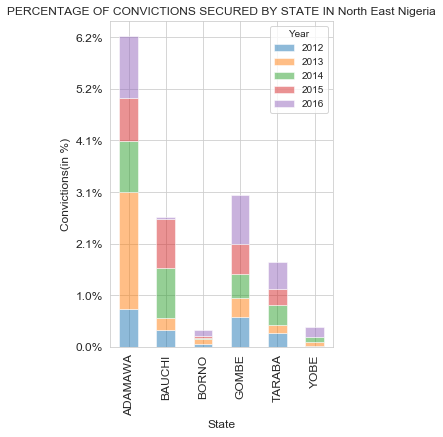

In [51]:
ne = pd.crosstab(df['north_east'], df['Year'])
make_barplot(pData=ne, original_df=drug_data, title="PERCENTAGE OF CONVICTIONS SECURED BY STATE IN North East Nigeria", figure=(4, 6), fontsize=12)


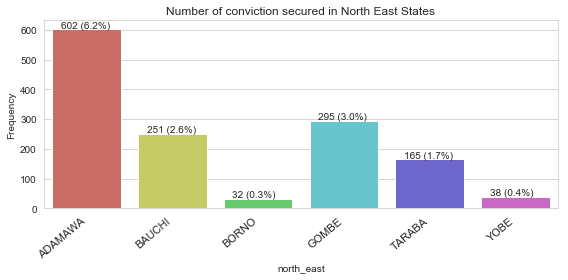

<Figure size 432x288 with 0 Axes>

In [52]:
make_plot(the_df = df, field="north_east", title="Number of conviction secured in North East States" , figsize=(8, 4), rotation=40, fontsize=11)


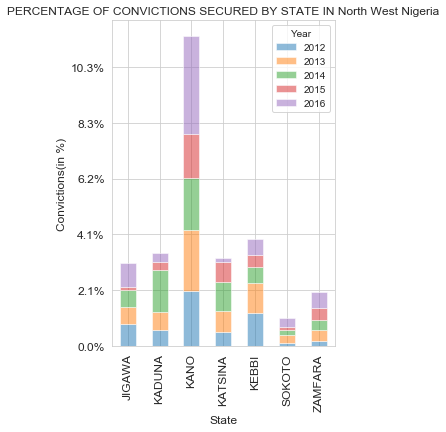

In [53]:
nw = pd.crosstab(df['north_west'], df['Year'])
make_barplot(pData=nw, original_df=drug_data, title="PERCENTAGE OF CONVICTIONS SECURED BY STATE IN North West Nigeria", figure=(4, 6), fontsize=12)


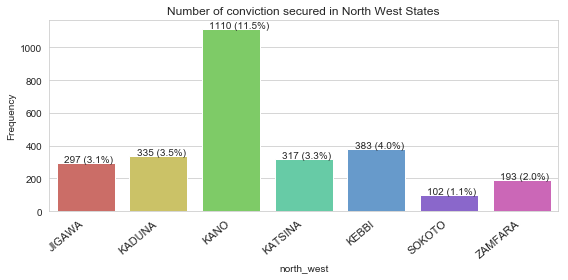

<Figure size 432x288 with 0 Axes>

In [54]:
make_plot(the_df = df, field="north_west", title="Number of conviction secured in North West States" , figsize=(8, 4), rotation=40, fontsize=11)


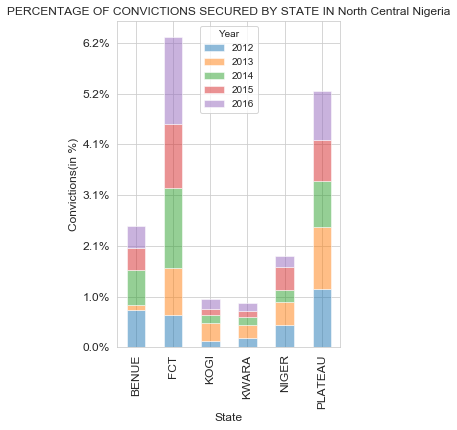

In [55]:
nc = pd.crosstab(df['north_central'], df['Year'])
make_barplot(pData=nc, original_df=drug_data, title="PERCENTAGE OF CONVICTIONS SECURED BY STATE IN North Central Nigeria", figure=(4, 6), fontsize=12)


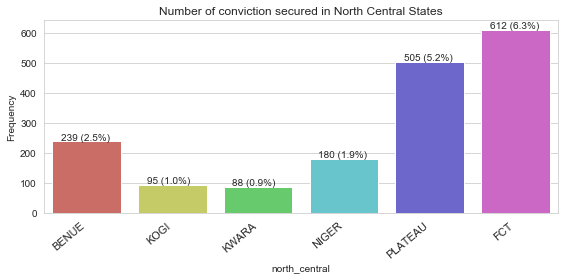

<Figure size 432x288 with 0 Axes>

In [56]:
make_plot(the_df = df, field="north_central", title="Number of conviction secured in North Central States" , figsize=(8, 4), rotation=40, fontsize=11)


In [57]:
rp.summary_cat(df[['Geo_zones', 'Year']])


,Variable,Outcome,Count,Percent
0,Geo_zones,North West,2737,29.06
1,,South West,1971,20.93
2,,North Central,1719,18.25
3,,North East,1383,14.68
4,,South South,960,10.19
5,,South East,649,6.89
6,Year,2016,2248,23.24
7,,2014,2057,21.26
8,,2013,1994,20.61
9,,2012,1711,17.68


In [58]:
pd.crosstab(df["Geo_zones"], df["Year"])

Year,2012,2013,2014,2015,2016
Geo_zones,,,,,
North Central,327,329,372,320,371
North East,198,320,292,271,302
North West,534,596,616,361,630
South East,79,93,152,136,189
South South,141,205,206,178,230
South West,383,404,367,341,476


In [59]:
states_notorious = list(df["State"].value_counts().index)[:10]
count = list(df["State"].value_counts())
def most_notorious_states(series, states_notories):
    if series in states_notorious:
        return series
    else:
        return
    
#least_of_most_notorious=list(zip(indx, states_l))[:5][-1]
df['most_notorious_states'] = df["State"].apply(lambda series: most_notorious_states(series, states_notorious))
#most_notorious
pd.crosstab(df["most_notorious_states"], df["Year"])

KeyError: 'Five_most_notorious'

In [ ]:
most_notorious = pd.crosstab(df['most_notorious_states'], df['Year'])
make_barplot(pData=most_notorious, original_df=drug_data, title="STATES WITH THE HIGHEST PERCENTAGE OF CONVICTED CASES IN Nigeria", figure=(4, 6), fontsize=12)


In [ ]:
make_plot(the_df = df, field="most_notorious_states", title="STATES WITH THE HIGHEST PERCENTAGE OF CONVICTED CASES IN Nigeria" , figsize=(8, 4), rotation=40, fontsize=11)


In [ ]:
crosstab = pd.crosstab(df["Geo_zones"], df["Year"])

In [ ]:
stats.chi2_contingency(crosstab)

In [ ]:
table, results = rp.crosstab(df["Geo_zones"], df["Year"], prop= 'col', test= 'chi-square')

In [ ]:
table

In [ ]:
results

In [ ]:
dummies_geo = pd.get_dummies(df['Geo_zones'])
dummies_yr = pd.get_dummies(df['Year'])
dummies_yr.head()

In [ ]:
sig = 0.05/30

In [ ]:

for series_g in dummies_geo:
    for series_y in dummies_yr:
        nl = "\n"
        crosstab = pd.crosstab(dummies_geo[f"{series_g}"], dummies_yr[f"{series_y}"])
        print(crosstab, nl)
        chi2, p, dof, expected = stats.chi2_contingency(crosstab)
        
        if p> sig:
            sig_label = "p-value is not statistically significant"
        else:
            sig_label = "p-value is statistically significant"
        print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl} {sig_label} {nl}(Sig.@{sig}) {nl}")

In [ ]:
table_h, results_h = rp.crosstab(df["High_zones"], df["Year"], prop= 'col', test= 'chi-square')

In [ ]:
results_h

In [ ]:
dummies_h = pd.get_dummies(df['High_zones'])
sig_h = 0.05/20 
for series_g in dummies_h:
    for series_y in dummies_yr:
        nl = "\n"
        crosstab = pd.crosstab(dummies_h[f"{series_g}"], dummies_yr[f"{series_y}"])
        print(crosstab, nl)
        chi2, p, dof, expected = stats.chi2_contingency(crosstab)
        
        if p> sig_h:
            sig_label = "p-value is not statistically significant"
        else:
            sig_label = "p-value is statistically significant"
        print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl} {sig_label} {nl}(Sig.@{sig_h}) {nl}")
        

In [ ]:
table_all, results_all = rp.crosstab(df["State"], df["Year"], prop= 'col', test= 'chi-square')

In [ ]:
results_all

In [ ]:
dummies_all = pd.get_dummies(df['State'])
sig_all = 0.05/(37*5) 
for series_all in dummies_all:
    for series_y in dummies_yr:
        nl = "\n"
        crosstab = pd.crosstab(dummies_all[f"{series_all}"], dummies_yr[f"{series_y}"])
        print(crosstab, nl)
        chi2, p, dof, expected = stats.chi2_contingency(crosstab)
        
        if p> sig_all:
            sig_label = "p-value is not statistically significant"
        else:
            sig_label = "p-value is statistically significant"
        print(f"Chi2 value = {chi2}{nl}p-value= {p}{nl}Degrees of freedom = {dof}{nl} {sig_label} {nl}(Sig.@{sig_all}) {nl}")
       